In [414]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [81]:
data = pd.read_excel('jester-data-3.xls',header=None)

In [82]:
data = data.rename({0:'Rate_count'},axis=1)

In [388]:
df = data.melt(id_vars="Rate_count",value_name="rating")
df = df.rename({'variable':'JokesId'},axis=1)


In [389]:
df.index.name ='userId'

In [390]:
df['rating'].replace(99.0,0,inplace=True)

<AxesSubplot:>

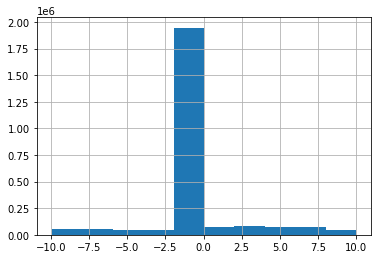

In [391]:
df['rating'].hist()

In [7]:
data

,Rate_count,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,26,99.0,99.00,99.0,99.0,-1.65,99.00,-0.78,6.89,99.0,...,99.0,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.0
1,33,99.0,99.00,99.0,99.0,-9.27,99.00,-9.17,-8.59,99.0,...,99.0,99.0,-2.77,99.0,99.00,99.0,99.0,99.0,99.00,99.0
2,16,99.0,99.00,99.0,99.0,-6.12,99.00,-7.48,-7.77,99.0,...,99.0,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.0
3,24,99.0,0.05,99.0,99.0,-2.82,99.00,-4.85,-0.87,99.0,...,99.0,99.0,99.00,99.0,1.84,99.0,99.0,99.0,-4.08,99.0
4,22,99.0,99.00,99.0,99.0,-4.95,99.00,6.21,2.72,99.0,...,99.0,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24933,21,99.0,99.00,99.0,99.0,5.78,8.45,99.00,8.20,99.0,...,99.0,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.0
24934,16,99.0,99.00,99.0,99.0,5.24,99.00,99.00,5.68,99.0,...,99.0,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.0
24935,35,99.0,99.00,99.0,99.0,-3.93,99.00,-9.03,-2.67,99.0,...,99.0,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.0
24936,21,99.0,99.00,99.0,99.0,9.42,9.66,99.00,9.17,99.0,...,99.0,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.0


In [45]:
data_n=data.loc[:,1:]
data_n.replace(99.0,0,inplace=True)
data_n

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
1,0.0,0.00,0.0,0.0,-9.27,0.00,-9.17,-8.59,0.0,0.00,...,0.0,0.0,-2.77,0.0,0.00,0.00,0.0,0.0,0.00,0.0
2,0.0,0.00,0.0,0.0,-6.12,0.00,-7.48,-7.77,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0
3,0.0,0.05,0.0,0.0,-2.82,0.00,-4.85,-0.87,0.0,0.00,...,0.0,0.0,0.00,0.0,1.84,0.00,0.0,0.0,-4.08,0.0
4,0.0,0.00,0.0,0.0,-4.95,0.00,6.21,2.72,0.0,-8.59,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0
5,0.0,0.00,0.0,0.0,3.11,0.00,4.42,1.41,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,4.47,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24933,0.0,0.00,0.0,0.0,5.78,8.45,0.00,8.20,0.0,8.50,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0
24934,0.0,0.00,0.0,0.0,5.24,0.00,0.00,5.68,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0
24935,0.0,0.00,0.0,0.0,-3.93,0.00,-9.03,-2.67,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0
24936,0.0,0.00,0.0,0.0,9.42,9.66,0.00,9.17,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0


<h3>16 rated jokes in row [ 1 ] and 84 "99's" means not Rated

In [46]:
data_n.iloc[0].value_counts()

 0.00    67
-8.59     4
-9.71     2
-7.67     2
-9.47     2
-9.56     2
-9.66     2
-7.18     1
-1.60     1
-9.27     1
-8.54     1
-3.45     1
-9.17     1
-2.67     1
-5.34     1
-6.41     1
-7.82     1
-1.65     1
-1.55     1
-2.77     1
-6.36     1
-4.71     1
-6.21     1
-3.59     1
-5.58     1
-4.85     1
Name: 1, dtype: int64

<h1>Item Based

In [22]:
from sklearn.metrics.pairwise import linear_kernel

In [47]:
item_matrix = linear_kernel(data_n.T,data_n.T)

In [48]:
item_matrix = pd.DataFrame(item_matrix,index=data_n.columns,columns=data_n.columns)

In [344]:
def getItem(itemid,k):
    sim_item = item_matrix[itemid]
    top =sim_item.nlargest(k)
    return top 

In [347]:
item_id = 2
item = getItem(item_id,k=10)

In [348]:
items = pd.DataFrame({'JokesId':item.index,'similarity':item.values})
items

,JokesId,similarity
0,2,4532.6482
1,29,1916.5872
2,35,1583.8675
3,69,1548.0276
4,50,1400.3988
5,36,1328.1283
6,56,1203.9445
7,27,1116.9382
8,66,1079.0862
9,49,941.5505


<h1>User based

In [52]:
user_matrix = linear_kernel(data_n,data_n)

In [53]:
user_matrix = pd.DataFrame(user_matrix,index=data_n.index,columns=data_n.index)
user_matrix

,1,2,3,4,5,6,7,8,9,10,...,24928,24929,24930,24931,24932,24933,24934,24935,24936,24937
1,1778.5546,467.9187,146.1892,-350.7982,-593.2410,411.6444,-367.1127,-97.4630,-487.0859,-62.1308,...,-272.8386,-423.6832,-833.4671,-327.4288,-343.5911,-600.7634,-426.9902,-104.7924,-934.8140,-848.6013
2,467.9187,772.4729,54.9651,4.4599,-188.5442,364.1994,-66.2368,320.0649,-122.8459,-144.7064,...,-119.5778,-63.3488,-573.9812,-88.4028,-189.6545,-247.6055,-168.6245,-1.2705,-302.1823,27.1513
3,146.1892,54.9651,202.1940,-103.5958,-90.5886,70.3020,-90.7399,56.8591,-155.3159,-85.1092,...,26.5406,-70.2597,-74.6291,-56.1888,-5.9985,-22.4897,-48.4751,-14.3652,-88.2200,-48.7861
4,-350.7982,4.4599,-103.5958,1092.0609,234.6663,8.5312,0.3556,31.3627,100.7427,74.6348,...,-22.1337,45.2634,165.0657,-24.7186,-25.8276,-253.8363,202.7111,133.1303,31.3547,351.7646
5,-593.2410,-188.5442,-90.5886,234.6663,662.1633,-222.1043,206.1332,51.2199,203.1417,223.3918,...,61.6186,87.8848,326.8025,55.7634,122.5872,159.5707,199.4319,-71.4668,283.8588,425.0295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24933,-600.7634,-247.6055,-22.4897,-253.8363,159.5707,-316.0409,37.6571,-200.7104,291.4368,-55.9819,...,299.9794,338.5109,776.4294,305.4954,463.3465,1455.6341,217.1651,-161.9762,779.1460,270.5741
24934,-426.9902,-168.6245,-48.4751,202.7111,199.4319,-116.7326,171.0109,25.4141,210.0175,3.8683,...,140.2296,176.9580,379.4071,8.5904,258.4824,217.1651,713.4533,132.6848,114.6422,431.2900
24935,-104.7924,-1.2705,-14.3652,133.1303,-71.4668,118.6333,353.4391,378.1723,-48.7115,21.1149,...,46.1197,130.0228,-17.7193,223.4520,42.0957,-161.9762,132.6848,1098.4243,93.0482,436.9048
24936,-934.8140,-302.1823,-88.2200,31.3547,283.8588,-245.7381,196.9055,44.9186,330.7667,150.6874,...,434.4677,374.3518,998.7340,350.1057,363.9952,779.1460,114.6422,93.0482,1596.1835,564.6841


In [350]:
def getuser(userid,k):
    sim_user = user_matrix[userid]
    top =sim_user.sort_values(ascending=False)
    return top[1:k]

In [353]:
top_user = getuser(3,10)
pd.DataFrame({'UserId':top_user.index,'similarity':top_user.values})

,UserId,similarity
0,23424,328.6963
1,22771,313.9121
2,23959,298.7328
3,23356,291.4463
4,3377,283.5435
5,22713,279.4523
6,11062,274.8514
7,12250,241.9000
8,20276,239.7536
9,16994,236.8222


<h1>Model Based

In [133]:
from surprise.model_selection import train_test_split,cross_validate
from surprise import SVD,Reader,Dataset,accuracy

In [114]:
reader =  Reader(rating_scale=(-10,10))
dd = Dataset.load_from_df(df,reader)

In [399]:
trainset , testset = train_test_split(dd,test_size=0.20,random_state=7)

In [400]:
model = SVD(lr_all=0.001,n_factors=50)

In [401]:
model.fit(trainset)

In [402]:
pred = model.test(testset)

In [403]:
pred[1]

Prediction(uid=34, iid=48, r_ui=-3.54, est=0.9427836692944123, details={'was_impossible': False})

In [405]:
accuracy.rmse(pred)

RMSE: 2.5650


2.565038501154731

In [432]:
def precision_k(predictions,k=10,threshold=0.5):
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls=dict()
    for uid , urerRating in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        # print(urerRating[1])
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])


        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])
        precisions[uid] =  n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions,recalls


In [438]:
# precisions
t=np.linspace(-10.,10.,50)
# t=[2.5]
for i in t:
    precisions,recalls =precision_k(pred,k=5,threshold=i)

    p=(sum(prec for prec in precisions.values()) / len(precisions))
    r=(sum(rec for rec in recalls.values()) / len(recalls))
    print(f'precision {p} recall {r} on threshold {i} \n\n')

precision 1.0 recall 0.5 on threshold -10.0 


precision 1.0 recall 0.5 on threshold -9.591836734693878 


precision 1.0 recall 0.5 on threshold -9.183673469387756 


precision 1.0 recall 0.5 on threshold -8.775510204081632 


precision 1.0 recall 0.5 on threshold -8.36734693877551 


precision 1.0 recall 0.5 on threshold -7.959183673469388 


precision 1.0 recall 0.5 on threshold -7.551020408163265 


precision 1.0 recall 0.5 on threshold -7.142857142857142 


precision 1.0 recall 0.5 on threshold -6.73469387755102 


precision 1.0 recall 0.5 on threshold -6.326530612244898 


precision 1.0 recall 0.5 on threshold -5.918367346938775 


precision 1.0 recall 0.5 on threshold -5.5102040816326525 


precision 1.0 recall 0.5 on threshold -5.1020408163265305 


precision 1.0 recall 0.5 on threshold -4.6938775510204085 


precision 1.0 recall 0.5 on threshold -4.285714285714286 


precision 1.0 recall 0.5 on threshold -3.8775510204081627 


precision 1.0 recall 0.5 on threshold -3.4693877551

In [440]:
precisions,recalls =precision_k(pred,k=5,threshold=0.6)
precisions,recalls

({17: 0.6,
  34: 0.6,
  18: 0.6,
  20: 0.6,
  21: 0.6,
  30: 0.6,
  19: 0.6,
  28: 0.6,
  24: 0.6,
  27: 0.6,
  23: 0.6,
  32: 0.6,
  22: 0.6,
  33: 0.6,
  31: 0.6,
  16: 0.6,
  29: 0.6,
  35: 0.6,
  25: 0.6,
  26: 0.6,
  15: 0.6},
 {17: 0.75,
  34: 0.75,
  18: 0.75,
  20: 0.75,
  21: 0.75,
  30: 0.75,
  19: 0.75,
  28: 0.75,
  24: 0.75,
  27: 0.75,
  23: 0.75,
  32: 0.75,
  22: 0.75,
  33: 0.75,
  31: 0.75,
  16: 0.75,
  29: 0.75,
  35: 0.75,
  25: 0.75,
  26: 0.75,
  15: 0.75})

In [395]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        # print(iid,est)
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [396]:
top_n = get_top_n(pred, n=10)
# top_n

In [182]:
 import re

In [325]:
def getJokes(file):
    path = f'./jester_dataset_1_joke_texts/jokes/init{file}.html'
    with open(path, "r", encoding='utf-8') as f:
        text= f.read()
        # print(text)
        start = text.find("<!--begin of joke -->") + len("<!--begin of joke -->")
        end = text.find("<!--end of joke -->")
        t =(text[start:end])
        return t

In [398]:
jokesid=set()
for uid, user_ratings in top_n.items():
    user,jokes=(uid, [iid for (iid, _) in user_ratings])
    # print(jokes)
    for i in jokes:
        jokesid.add(i)
print(jokesid)
for file in jokesid:
    print(f'{"-"*40}JokeId {file}{"-"*45} {getJokes(file)}{"-"*100}\n\n')


{32, 5, 76, 50, 21, 27, 29, 62}
----------------------------------------JokeId 32--------------------------------------------- 
A man arrives at the gates of heaven. St. Peter asks, "Religion?" 
The man says, "Methodist." St. Peter looks down his list, and says, 
"Go to room 24, but be very quiet as you pass room 8." 
<P>
Another man arrives at the gates of heaven. "Religion?"
"Baptist." "Go to room 18, but be very quiet as you pass room 8." 
<P>
A third man arrives at the gates. "Religion?" "Jewish."
"Go to room 11, but be very quiet as you pass room 8." 
The man says, "I can understand there being different rooms for different religions, but why
must I be quiet when I pass room 8?" St. Peter tells him, "Well the Catholics are in room 8, 
and they think they're the only ones here.
----------------------------------------------------------------------------------------------------


----------------------------------------JokeId 5--------------------------------------------- 
Q.	What's

In [301]:
final = pd.DataFrame({'u':userid,'j':jokesid})
final

,u,j
0,24,{50}
1,18,{50}
2,31,{27}
3,25,{50}
4,29,{50}
5,22,{50}
6,33,{27}
7,28,{27}
8,35,{27}
9,30,{27}


In [137]:
cross_validate(model,dd,cv=3)

{'test_rmse': array([2.5738067 , 2.58743182, 2.60043542]),
 'test_mae': array([1.20890669, 1.2658846 , 1.30227421]),
 'fit_time': (145.22379231452942, 185.27940273284912, 230.84769105911255),
 'test_time': (8.394989013671875, 15.545635461807251, 13.717051982879639)}